In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

df=pd.read_csv("/content/drive/MyDrive/Deeplearning/Final Project/Reviews.csv", encoding='latin-1', index_col=0)
df=df.loc[:,["Text","Score"]].dropna().reset_index(drop=True)

In [3]:
len(df)

568454

In [4]:
df.loc[df['Score'] <=2, 'Score'] = -1
df.loc[df['Score'] > 3, 'Score'] = 1
df.loc[df['Score'] == 3, 'Score'] = 0
df['len'] = df.Text.apply(lambda x: len(x.split()))
df = df[df.len<50]

In [5]:
import re
df['Text']=df['Text'].apply(lambda row : re.sub('<.*?>','',row))

In [6]:
df["Score"].value_counts()

 1    203802
-1     30286
 0     14346
Name: Score, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
rev=df["Text"]
target=df["Score"]
x_train, x_test, y_train, y_test = train_test_split(rev,target,test_size=0.1,random_state=0,stratify=target)


In [12]:
# Optional code for glove download
import requests  
import os  
file_url = "http://nlp.stanford.edu/data/glove.6B.zip"
    
r = requests.get(file_url, stream = True)  

if not os.path.exists("glove.6B.zip"):
  print("Downloading...")
  with open("glove.6B.zip", "wb") as file:  
    for block in r.iter_content(chunk_size = 1024): 
      if block:  
        file.write(block)  
else:
  print("Archive file already existed. Delete the original zip file if you want to re-download")


print("Uncompressing...")
!unzip 'glove.6B.zip'

Downloading...
Uncompressing...
Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [23]:
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(layers.Embedding(max_features, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(64, 5, activation='relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='sigmoid'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 80, 100)           1000000   
                                                                 
 conv1d (Conv1D)             (None, 76, 64)            32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 25, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 21, 32)            10272     
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 3

In [24]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='accuracy')
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=batch_size,
                    validation_data=(X_test,y_test))
keras.backend.clear_session()
del model

Epoch 1/10
6988/6988 [==============================] - 135s 19ms/step - loss: 0.1163 - accuracy: 0.7289 - val_loss: -0.2609 - val_accuracy: 0.7698
Epoch 2/10
6988/6988 [==============================] - 138s 20ms/step - loss: -0.3245 - accuracy: 0.7594 - val_loss: -0.2173 - val_accuracy: 0.7945
Epoch 3/10
6988/6988 [==============================] - 138s 20ms/step - loss: -0.4045 - accuracy: 0.7650 - val_loss: 0.0050 - val_accuracy: 0.8099
Epoch 4/10
6988/6988 [==============================] - 140s 20ms/step - loss: -0.4379 - accuracy: 0.7706 - val_loss: -0.4301 - val_accuracy: 0.7170
Epoch 5/10
6988/6988 [==============================] - 140s 20ms/step - loss: -0.4358 - accuracy: 0.7691 - val_loss: -0.2695 - val_accuracy: 0.7784
Epoch 6/10
6988/6988 [==============================] - 140s 20ms/step - loss: -0.4279 - accuracy: 0.7774 - val_loss: -0.4670 - val_accuracy: 0.7364
Epoch 7/10
6988/6988 [==============================] - 142s 20ms/step - loss: -0.4652 - accuracy: 0.7767 - 

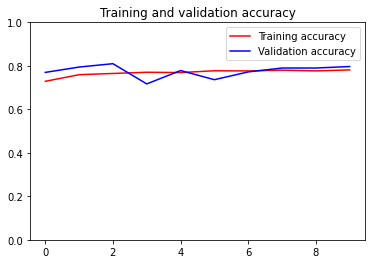

In [25]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss= history.history['loss']
epochs = range(len(loss))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.ylim(ymax=1,ymin=0)

plt.show()